1. Implement the intensity transformation depicted in Fig. 1a on the image shown in Fig. 1b. 

<>:24: SyntaxWarning: invalid escape sequence '\m'
<>:24: SyntaxWarning: invalid escape sequence '\m'
C:\Users\pasin\AppData\Local\Temp\ipykernel_30788\877920196.py:24: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')


51
100
105
256


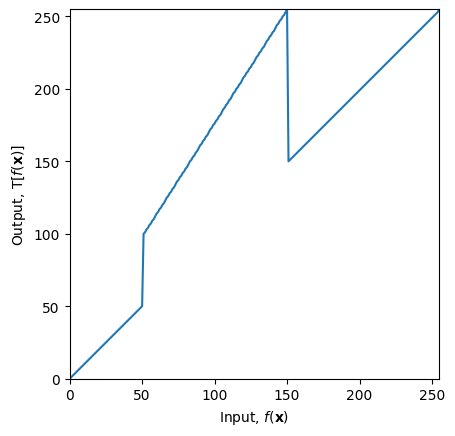

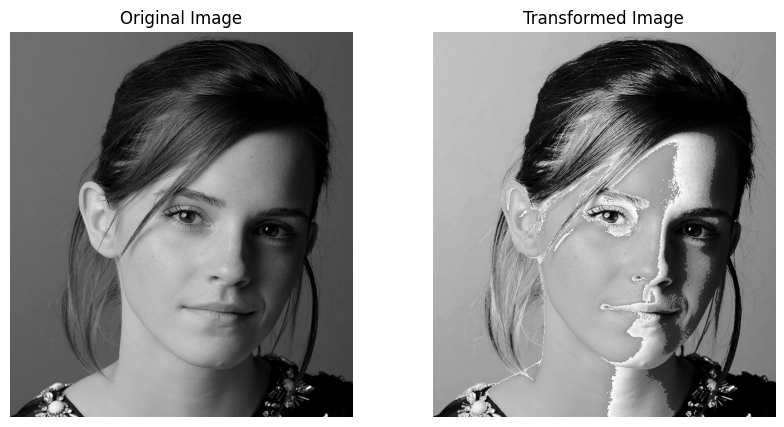

In [1]:
# Intensity Windowing
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# breaking points in the piecewise linear transformation
c1 = np.array([(50, 50), (50, 100), (150, 255), (150, 150)])

# linspace ( starting point, ending point, number of points)
t1 = np.linspace(0, 50, num=51 ).astype('uint8')
print(len(t1))
t2 = np.linspace(100, 255, num=100).astype('uint8')
print(len(t2))
t3 = np.linspace(150, 255, num= 105).astype('uint8')
print(len(t3)) 
 
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal') 
plt.show()


img_orig = cv.imread('a1images/emma.jpg', cv.IMREAD_GRAYSCALE)
image_transformed = cv.LUT(img_orig, transform)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(img_orig, cmap='gray', vmin=0, vmax=255)
axes[0].set_title("Original Image")
axes[0].axis('off')
axes[1].imshow(image_transformed, cmap='gray', vmin=0, vmax=255)
axes[1].set_title("Transformed Image")
axes[1].axis('off')
plt.show()

2. Apply a similar operation as above (question 1) to accentuate

(a) white matter

(b) gray matter

in the brain proton density image shown in Fig. 2. Show the intensity transformations as a plots.

(a) white matter

(256,)


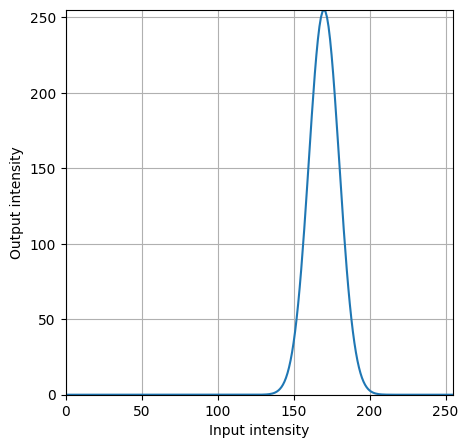

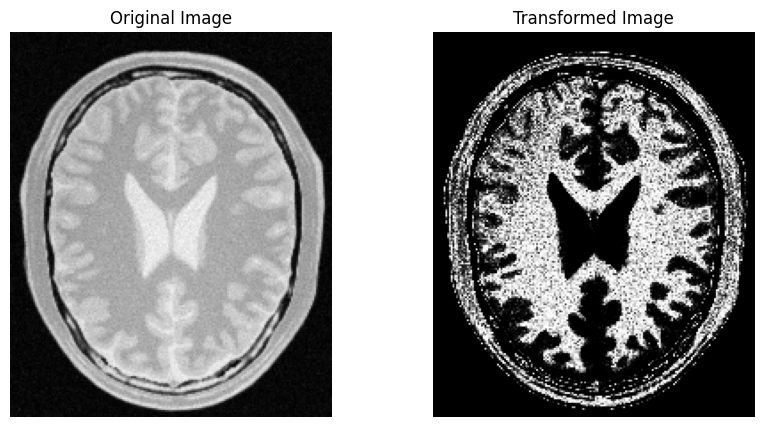

In [2]:
mu = 170
sigma = 10
x = np.linspace(0, 255, num=256)
t = 255 * np.exp(-((x - mu)**2) / (2 * sigma**2))

t = np.clip(t, 0, 255)
print(t.shape)

# Plot the array
plt.figure(figsize=(5, 5))
plt.plot(t)
plt.xlabel("Input intensity")
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.ylabel("Output intensity")
plt.grid(True)
plt.show()

img_orig = cv.imread('a1images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
image_transformed = cv.LUT(img_orig, t)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(img_orig, cmap='gray', vmin=0, vmax=255)
axes[0].set_title("Original Image")
axes[0].axis('off')
axes[1].imshow(image_transformed, cmap='gray', vmin=0, vmax=255)
axes[1].set_title("Transformed Image")
axes[1].axis('off')
plt.show()

(b) gray matter

(256,)


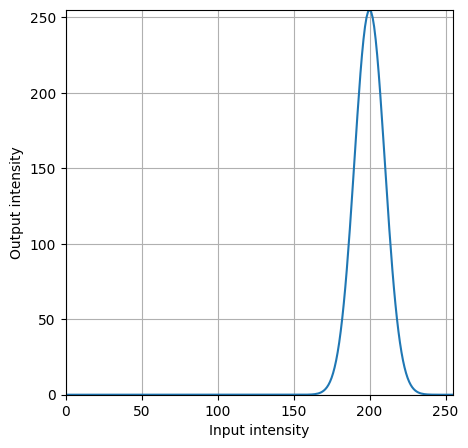

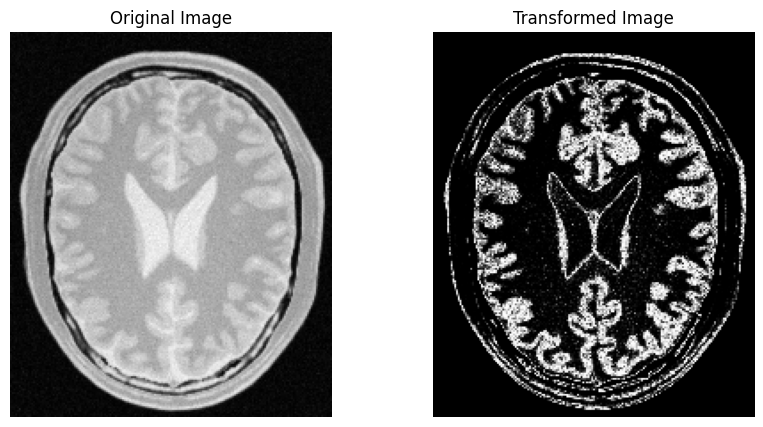

In [3]:
mu = 200
sigma = 10
x = np.linspace(0, 255, num=256)
t = 255 * np.exp(-((x - mu)**2) / (2 * sigma**2))

t = np.clip(t, 0, 255)
print(t.shape)

# Plot the array
plt.figure(figsize=(5, 5))
plt.plot(t)
plt.xlabel("Input intensity")
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.ylabel("Output intensity")
plt.grid(True)
plt.show()

img_orig = cv.imread('a1images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
image_transformed = cv.LUT(img_orig, t)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(img_orig, cmap='gray', vmin=0, vmax=255)
axes[0].set_title("Original Image")
axes[0].axis('off')
axes[1].imshow(image_transformed, cmap='gray', vmin=0, vmax=255)
axes[1].set_title("Transformed Image")
axes[1].axis('off')
plt.show()

3. Consider the image shown in Fig. 31.

(a) Apply gamma correction to the L plane in the L∗a∗b∗ color space and state the γ value.

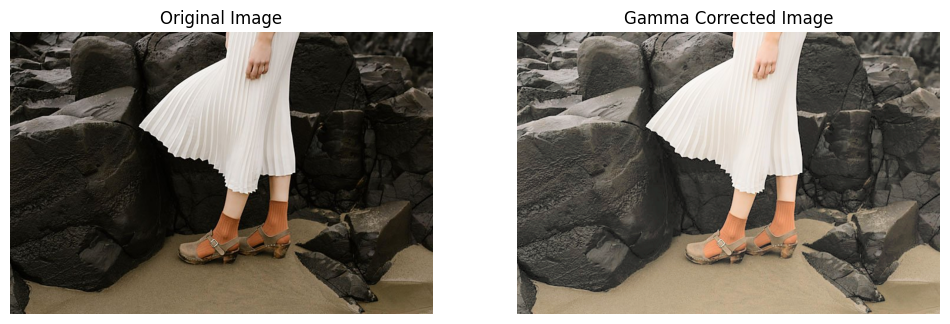

In [4]:
# Gamma Correction
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

gamma = 0.5
img_bgr = cv.imread('a1images/highlights_and_shadows.jpg')
img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)
img_lab = cv.cvtColor(img_bgr, cv.COLOR_BGR2Lab)

# Split channels
L,a,b = cv.split(img_lab)

# Apply gamma transformation
t = np.array([(i/255.0)**(gamma)*255 for i in np.arange(0, 256)]).astype('uint8')
L_modified = cv.LUT(L, t)

# Merge the channels
img_merged = cv.merge([L_modified, a, b])
img_modified = cv.cvtColor(img_merged, cv.COLOR_LAB2RGB)
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(img_rgb)
ax[0].set_title('Original Image')
ax[1].imshow(img_modified)
ax[1].set_title('Gamma Corrected Image')
for a in ax:
    a.axis('off')
plt.show()


(b) Show the histograms of the original and corrected images.

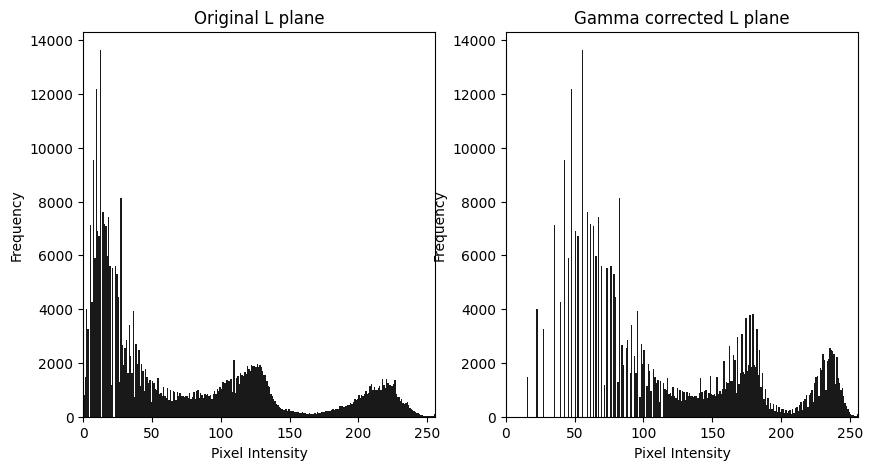

In [5]:
hist1 = cv.calcHist([L], [0], None, [256], [0, 256])
hist2 = cv.calcHist([L_modified], [0], None, [256], [0, 256])

L_flat = L.flatten()
L_modified_flat = L_modified.flatten()


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(L_flat, bins=256, range=(0, 256), color='black', alpha=0.9)
plt.title('Original L plane')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])

plt.subplot(1, 2, 2)
plt.hist(L_modified_flat, bins=256, range=(0, 256), color='black', alpha=0.9)
plt.title('Gamma corrected L plane')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])
plt.show()

4. Increasing the vibrance of a photograph is probably achieved by applying an intensity transformation
to the saturation plane, where x is the input intensity, a ∈ [0,1] and σ = 70.

(a) Split the image shown in Fig. 4 into hue, saturation, and value planes.

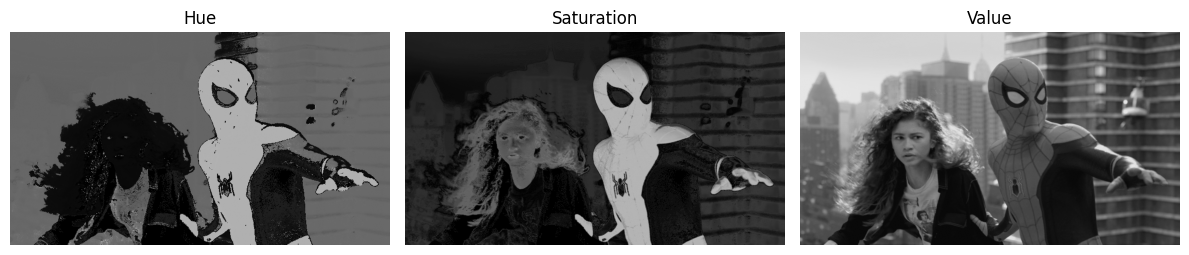

In [6]:
img4 = cv.imread('a1images/spider.png')
img4_hsv = cv.cvtColor(img4, cv.COLOR_BGR2HSV)
img4_rgb = cv.cvtColor(img4, cv.COLOR_BGR2RGB)

H, S, V = cv.split(img4_hsv)


fig, ax = plt.subplots(1, 3, figsize=(12, 8))
ax[0].imshow(H, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Hue')
ax[0].axis("off")
ax[1].imshow(S, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Saturation')
ax[1].axis("off")
ax[2].imshow(V, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Value')
ax[2].axis("off")

plt.tight_layout()
plt.show()

(b) Apply the aforementioned intensity transformation to the saturation plane.

(c) Adjust a to get a visually pleasing output. Report the value of a.

(d) Recombine the three planes.

(e) Display the original image, vibrance-enhanced image, and the intensity transformation.

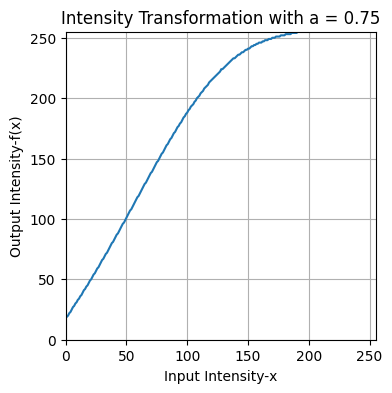

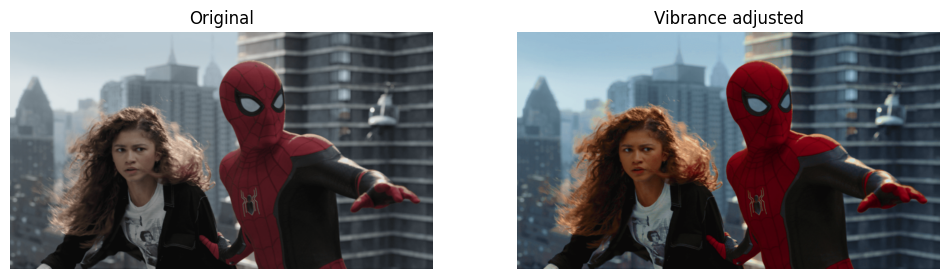

In [7]:
a = 0.75
sigma = 70.0 
x = np.arange(0, 256)
f = np.minimum(x + a * 128 * np.exp(-((x - 128)**2) / (2 * sigma**2)), 255).astype('uint8')

plt.figure(figsize=(4, 4))
plt.plot(x, f)
plt.title(f'Intensity Transformation with a = 0.75')
plt.xlabel('Input Intensity-x')
plt.ylabel('Output Intensity-f(x)')
plt.grid(True)
plt.xlim([0, 255])
plt.ylim([0, 255])
plt.show()


S_modified = cv.LUT(S, f)
merged = cv.merge([H, S_modified, V])
img4_modified = cv.cvtColor(merged, cv.COLOR_HSV2RGB)



fig, axs = plt.subplots(1, 2, figsize=(12, 8))
axs[0].imshow(img4_rgb)
axs[0].set_title('Original')
axs[0].axis('off')  
axs[1].imshow(img4_modified)
axs[1].set_title('Vibrance adjusted')
axs[1].axis('off')  
plt.show()

5. Write a function of your own to carry out histogram equalization on the image shown in Fig. 5. Show the
histograms before and after equalization.

6. In this question, we will apply histogram equalization only to the foreground of an image to produce an
image with a histogram equalized foreground.

(a) Open the image in Fig. 6, split it into hue, saturation, and values and display these planes in grayscale.


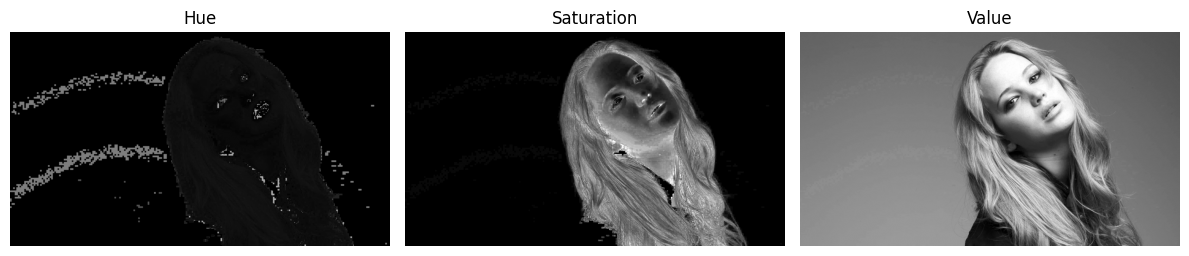

In [8]:
img6 = cv.imread('a1images/jeniffer.jpg')
img6_hsv = cv.cvtColor(img6, cv.COLOR_BGR2HSV)
img6_rgb = cv.cvtColor(img6, cv.COLOR_BGR2RGB)

H, S, V = cv.split(img6_hsv)

fig, ax = plt.subplots(1, 3, figsize=(12, 8))
ax[0].imshow(H, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Hue')
ax[0].axis('off')
ax[1].imshow(S, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Saturation')
ax[1].axis('off')
ax[2].imshow(V, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Value')
ax[2].axis('off')
plt.tight_layout()
plt.show()


(b) Select the appropriate plane to threshold in extract the foreground mask. A mask is a binary image.



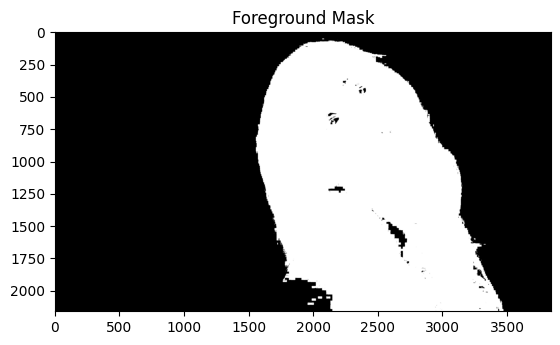

In [9]:
_, mask = cv.threshold(S, 15, 255, cv.THRESH_BINARY)
# Saturation plane brings out the subject in foreground the most

plt.imshow(mask, cmap='gray')
plt.title('Foreground Mask')
plt.show()

(c) Now obtain the foreground only using cv.bitwise_and and compute the histogram.



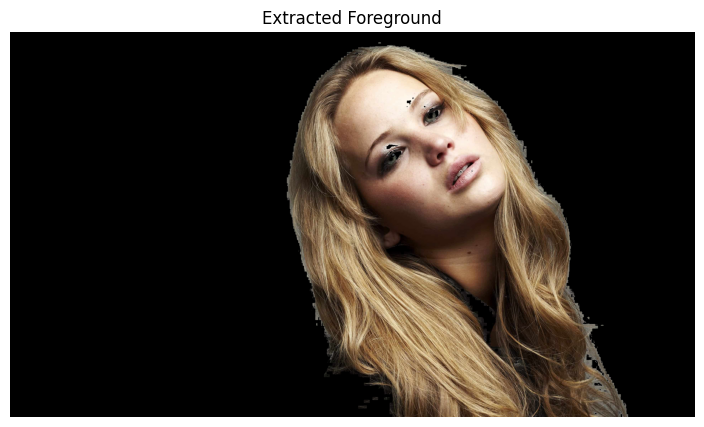

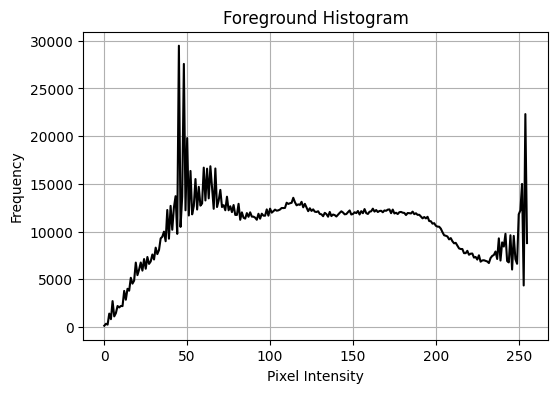

In [10]:
foreground = cv.bitwise_and(img6, img6, mask=mask)
H_fg, S_fg, V_fg = cv.split(foreground)

plt.figure(figsize=(10, 5))
plt.imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))
plt.title('Extracted Foreground')
plt.axis('off')
plt.show()

hist = cv.calcHist([V_fg], [0], mask, [256], [0, 256])

plt.figure(figsize=(6,4))
plt.plot(hist, color='black')
plt.title("Foreground Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

(d) Obtain the cumulative sum of the histogram using np.cumsum.



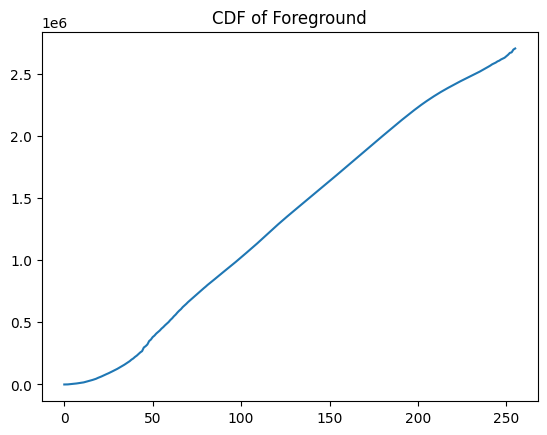

In [11]:
cdf = np.cumsum(hist)

plt.plot(cdf)
plt.title("CDF of Foreground")
plt.show()


(e) Use the formulas in slides to histogram-equalize the foreground.



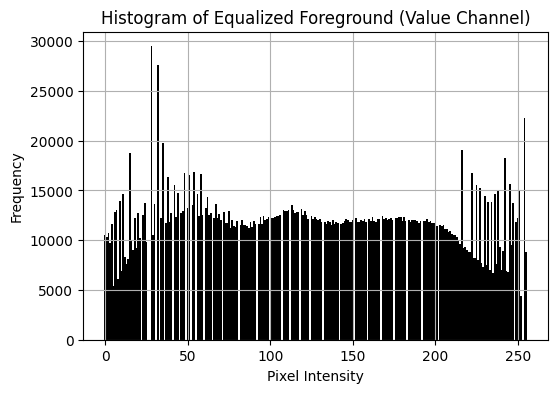

In [12]:
pixels = cdf[-1]
L = 256

t = np.array([(L-1)/(pixels)*cdf[k] for k in range(256)]).astype("uint8")
V_eq = t[V_fg]

hist_eq = cv.calcHist([V_eq], [0], mask, [256], [0, 256])
plt.figure(figsize=(6,4))
plt.bar(range(256), hist_eq.flatten(), color='black', width=1)
plt.title('Histogram of Equalized Foreground (Value Channel)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

(f) Extract the background and add with the histogram equalized foreground.

Show the hue, saturation, and value plane, the mask, the original image, and the result with the histogram-
equalized foreground.

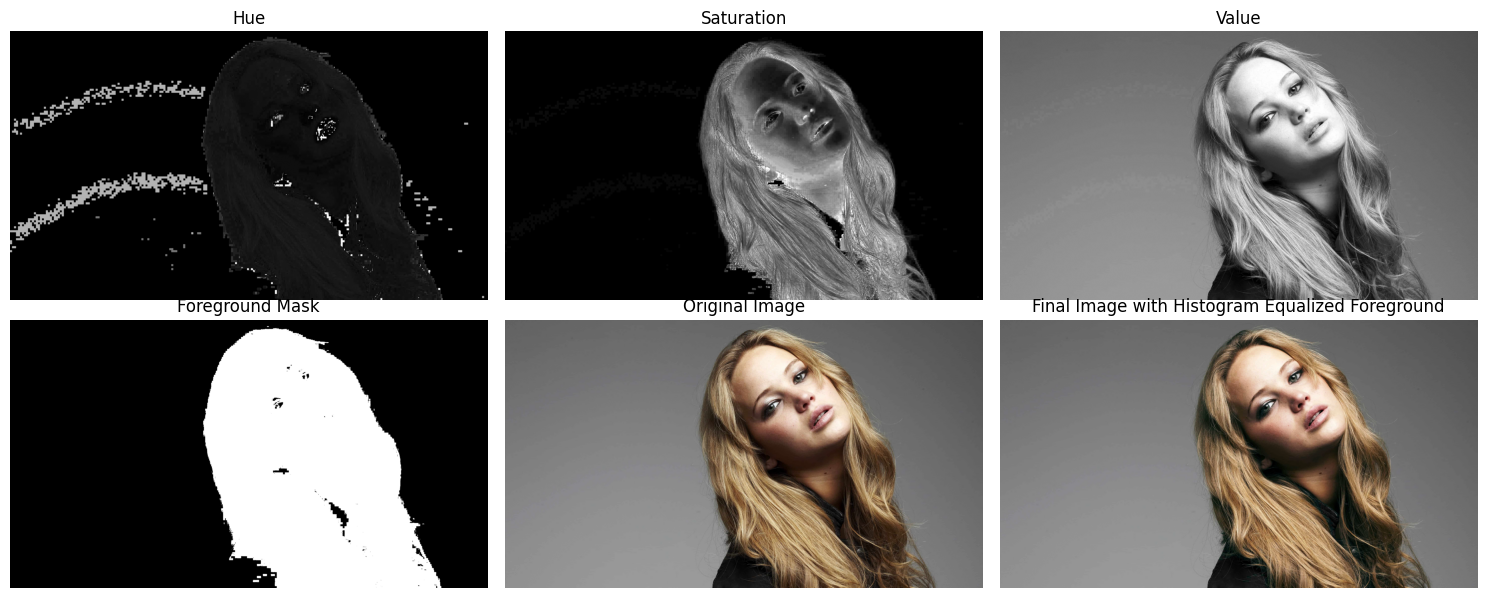

In [17]:
merged = cv.merge([H_fg, S_fg, V_eq])
foreground_modified = cv.cvtColor(merged, cv.COLOR_BGR2RGB)
background = cv.bitwise_and(img6, img6, mask=cv.bitwise_not(mask))
final = cv.add(cv.cvtColor(background, cv.COLOR_BGR2RGB), foreground_modified)

plt.figure(figsize=(15, 6))

plt.subplot(2, 3, 1)
plt.imshow(H, cmap='gray')
plt.title('Hue')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(S, cmap='gray')
plt.title('Saturation')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(V, cmap='gray')
plt.title('Value')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(mask, cmap='gray')
plt.title('Foreground Mask')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(img6_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(final)
plt.title('Final Image with Histogram Equalized Foreground')
plt.axis('off')

plt.tight_layout()
plt.show()


7. Filtering with the Sobel operator can compute the gradient. Consider the image shown in Fig. 7

(a) Using the existing filter2D to Sobel filter the image.


(b) Write your own code to Sobel filter the image.


(c) Using the property given carry out Sobel filtering.